# Plot AFAPE Results
Plot the results for different agents 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [3]:
# which dataset to work on 
dataset_name   = "synthetic_4_2"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agents
agent_names  = ['Random 0% with TCN', 'Random 10% with TCN', 'Random 50% with TCN', 'Random 100% with TCN']
n_agents = len(agent_names) 

# name for mi datasets
mi_model_name = 'gaussian_process'

# included estimators
included_estimator_types =  ['blocking', 'ground_truth', mi_model_name ]
included_estimator_types =  ['blocking', 'ground_truth', 'gaussian_process']

In [4]:
# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dirs     = [data_dir + 'afa_agents' + '/' + agent_name + '/' for agent_name in agent_names]

# find all bootstrap results files
agent_bootstrap_files_list = []
for agent_i in range(n_agents):
    agent_bootstrap_files = {}
    for included_estimator_type in included_estimator_types:
        agent_bootstrap_files[included_estimator_type] = agent_dirs[agent_i] + included_estimator_type + '_' + 'J_bootstraps.hkl'
    agent_bootstrap_files_list.append(agent_bootstrap_files)

## Write a Report

In [5]:
from afa.afa_models.afa_estimators.afa_report import AFAReport

In [7]:
agent_bootstrap_files_list

[{'blocking': '../../../data/ts/synthetic_1/MCAR_1/afa_agents/DQN/blocking_J_bootstraps.hkl',
  'ground_truth': '../../../data/ts/synthetic_1/MCAR_1/afa_agents/DQN/ground_truth_J_bootstraps.hkl',
  'mi_simple': '../../../data/ts/synthetic_1/MCAR_1/afa_agents/DQN/mi_simple_J_bootstraps.hkl'}]

Agent:  Random 0% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator     &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking      &     13.812 &   0.345 &      0.0256 \\
 CC            &      8.333 &   5.134 &      0.3812 \\
 IPW\_miss      &      6.588 &   6.879 &      0.5108 \\
 IPW\_miss\_gt   &      7.313 &   6.154 &      0.457  \\
 IPW           &     12.235 &   1.232 &      0.0915 \\
 IPW,gt        &     12.27  &   1.197 &      0.0888 \\
 IPW,gt,not\_pd &     10.819 &   2.648 &      0.1966 \\
 DM            &      0.29  &  13.176 &      0.9784 \\
 DR            &     11.959 &   1.508 &      0.112  \\
 Ground\_truth  &     13.467 &   0     &      0      \\
 mi\_simple     &     13.75  &   0.283 &      0.021  \\
\hline
\end{longtable}
Agent:  Random 10% with TCN
\begin{longtable}{lrrr}
\hline
 Estimator        &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking         &      6.787 &   5.102 &      3.0285 \\
 CC               &    nan     & nan     &  

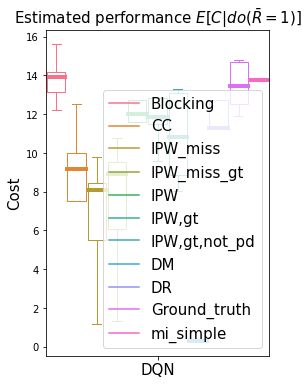

In [9]:
afa_report = AFAReport( agent_bootstrap_files_list = agent_bootstrap_files_list, 
                        agent_names                = agent_names, 
                        dataset_name               = dataset_name, 
                        miss_scenario              = miss_scenario) 

explanation_file = data_dir + 'afape_report.md'  # +  'reports/' + 'model_report' 
afa_report.explain(file= explanation_file, format = 'markdown')